چند مدل امتحان شد ولی به نظر میرسد نتایجی که بدست آمده واقعی نباشد احتمالا  به دلیل کراپ نکردن تصویر
این نتایج بدست آمده چندین تابع برای کراپ تصویر امتحان شد ولی در مراحل بعدی با خطا مواجه میشد
(تابع ها در انتهای فایل )

In [193]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
!pip install imutils


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import imutils
import pandas as pd

In [208]:
final_file = []
filenames1 = glob.glob('yes\*.jpg')
for filename in filenames1:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    img= cv2.resize(img,(100,100))
    final_file.append(img)
    
    
filenames2 = glob.glob('no\*.jpg')
for filename1 in filenames2:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    img= cv2.resize(img,(100,100))
    final_file.append(img)

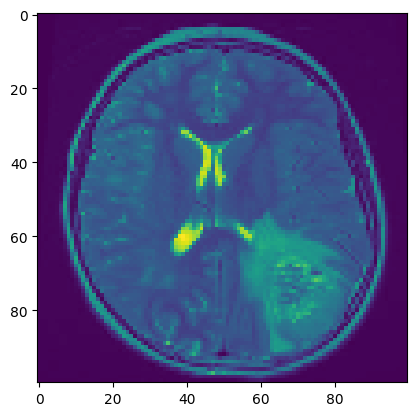

In [224]:
plt.imshow(final_file[2])
plt.show()

In [209]:
final_file = np.array(final_file)
print(final_file.shape)

(239, 100, 100)


In [210]:
labels = []

for img in filenames1:
    labels.append(0)
    
for img in filenames2:
    labels.append(1)

In [212]:
X =final_file.reshape(239,10000)
y = labels.reshape(239,1)

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix ,accuracy_score ,classification_report
from sklearn.model_selection import GridSearchCV

In [228]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,
                                           shuffle=True,random_state=1)

In [216]:
# x_train1 = x_train/255
# x_test1 = x_test/255

In [229]:
lg = LogisticRegression()
lg.fit(x_train1,y_train)

LogisticRegression()

In [230]:
lg.score(x_train,y_train)


0.9953488372093023

In [231]:
lg.score(x_test,y_test)

1.0

In [233]:
svm_model = SVC(kernel='linear',C = 0.1,random_state=0)
svm_model.fit(x_train,y_train)

SVC(C=0.1, kernel='linear', random_state=0)

In [234]:
svm_model.score(x_train,y_train)

0.9953488372093023

In [235]:
svm_model.score(x_test,y_test)

1.0

In [ ]:
pca = PCA(.95)
pca.fit(x_train)

In [258]:
train_pca = pca.transform(x_train)
test_pca = pca.transform(x_test)

In [259]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_2, y_train)
test_pred=logisticRegr.predict(test_pca)

In [260]:
conf_matrix = confusion_matrix(y_test,test_pred)
print(conf_matrix )

[[14  0]
 [ 0 10]]


In [262]:
parameters = { 'C' : [1.1,1.25,1.5]}


grid_search = GridSearchCV(estimator = logisticRegr, param_grid = parameters
                        , scoring = 'accuracy', cv = 3, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(train_pca , y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [263]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.6573422013562858
{'C': 1.25}


In [204]:
def crop_brain_contour(image, plot=False):
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
                            cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    # extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
       # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, 
                        bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, 
                        labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, 
            bottom=False, left=False, right=False,labelbottom=False, 
            labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

In [205]:
IMG_SIZE = (224,224)
img = final_file[3]
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
#gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()


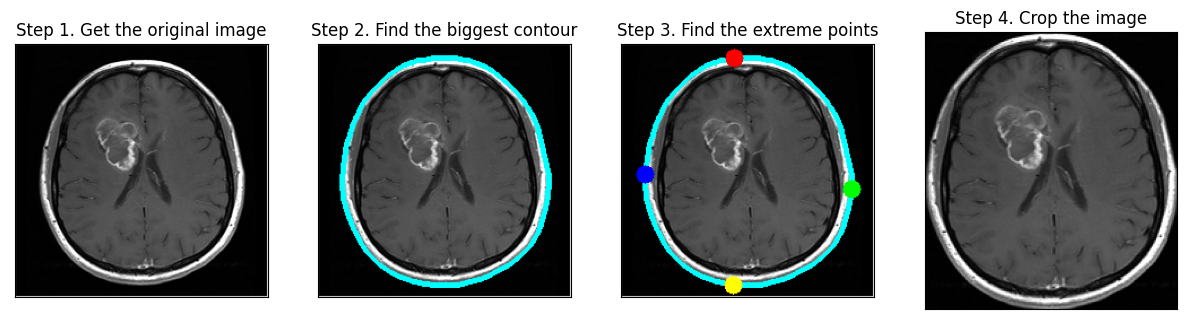

In [206]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [207]:
def Croping_Data(file):

    # load all images in a directory
    final_file2=[]
    
    for img in file:
        image = crop_brain_contour(img, plot=False)
        final_file2.append(image)
                
    final_file2 = np.array(final_file2)
    
    return final_file2

In [183]:
final_file2 = Croping_Data(final_file)

UnboundLocalError: local variable 'gray' referenced before assignment

In [184]:
def Resize_Data(file):

    # load all images in a directory
    final_file2=[]
    
    IMG_WIDTH, IMG_HEIGHT = (100, 100)
    
    for img in file:
        
        image = cv2.resize(img, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)
        # normalize values
        image = image / 255.
        # convert image to numpy array and append it to X
        filenames2.append(np.array(img).flatten())
    final_file2 = np.array(final_file2)
    
    return final_file2

In [185]:
final_file2 = Resize_Data(final_file2)

In [ ]:
final_file = []
filenames1 = glob.glob('yes/*.jpg')
for filename in filenames1:
    img = cv2.imread(filename)
    img= cv2.resize(img, (100,100))
    img = img.flatten()
    if img.shape == (10000,):
        gray = cv2.cvtColor(img.reshape((100, 100, 3)), cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        crop_img = img[y:y+h, x:x+w]
        final_file.append(crop_img)

filenames2 = glob.glob('no/*.jpg')
for filename in filenames2:
    img = cv2.imread(filename)
    img= cv2.resize(img, (100,100))
    img =img.flatten()
    if img.shape == (10000,):
        gray = cv2.cvtColor(img.reshape((100, 100, 3)), cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        crop_img = img[y:y+h, x:x+w]
        final_file.append(crop_img)    
    
# Convert the list to a numpy array
final_file = np.array(final_file)

if final_file.shape[0] != 241:
    print(f"Length of final_file is {final_file.shape[0]}, not 241")

# Reshape the array to have the desired shape
final_file = np.reshape(final_file, (241, 100, 100))

# Print the shape of the array
print(final_file.shape)

In [186]:
final_file2 = np.array(final_file)
print(final_file2.shape)

(239, 100, 100)
